Copyright (C) Microsoft Corporation.

# Data ingestion and preperation

**Important**: Make sure the kernel is set to "Your project name myvm" which can be done from the *Kernel* menu under *Change kernel*.

This notebook provides the steps required to prepare the data for modelling.

In [1]:
%matplotlib inline
import os
from os import path
from glob import glob, iglob
import zipfile
from azure.storage.blob import BlockBlobService
from PIL import Image
import matplotlib.pyplot as plt

When executing on a remote compute target, Azure ML Workbench uses a shared folder for hosting data such as training data which remains the same accross independent runs of the notebook. The shared folder feature allows you to read from or write to a special folder identified by the environment variable AZUREML_NATIVE_SHARE_DIRECTORY. We will use this location to save our training images.

In [3]:
save_path = os.environ['AZUREML_NATIVE_SHARE_DIRECTORY']
save_path

'/azureml-share/'

## Download data from blob storage

First, you will download the train.zip file from blob storage to AZUREML_NATIVE_SHARE_DIRECTORY. Locate your storage account name and key as described in the Getting Started document of this tutorial and provide your values in the following cell where indicated.

In [4]:
ACCOUNT_NAME = 'Your Storage Account Name Here!!'
ACCOUNT_KEY = 'Your Storage Account Key Here!!'
CONTAINER_NAME = "images"
ZIP_FILE = 'train.zip'
DESTINATION_FILE = path.join(save_path, ZIP_FILE )

You will use [Azure Storage SDK](https://github.com/Azure/azure-storage-python/) to download the training data.

In [5]:
block_blob_service = BlockBlobService(account_name=ACCOUNT_NAME, account_key=ACCOUNT_KEY)
block_blob_service.get_blob_to_path(container_name=CONTAINER_NAME, blob_name=ZIP_FILE, file_path=DESTINATION_FILE)

Extract train.zip to the share folder.

In [6]:
zip_file_path = path.join(save_path, ZIP_FILE)
zip = zipfile.ZipFile(zip_file_path)
zip.extractall(save_path)

Check if the files are downloaded and extracted to the share folder.

In [14]:
!ls $save_path

train  train.zip


## Rename image files

Check the names of the image files in the train folder.

In [11]:
old_file_names = glob(path.join(save_path, 'train/*'))
sorted(old_file_names)

['/azureml-share/train/cat.0.jpg',
 '/azureml-share/train/cat.1.jpg',
 '/azureml-share/train/cat.10.jpg',
 '/azureml-share/train/cat.100.jpg',
 '/azureml-share/train/cat.1000.jpg',
 '/azureml-share/train/cat.10000.jpg',
 '/azureml-share/train/cat.10001.jpg',
 '/azureml-share/train/cat.10002.jpg',
 '/azureml-share/train/cat.10003.jpg',
 '/azureml-share/train/cat.10004.jpg',
 '/azureml-share/train/cat.10005.jpg',
 '/azureml-share/train/cat.10006.jpg',
 '/azureml-share/train/cat.10007.jpg',
 '/azureml-share/train/cat.10008.jpg',
 '/azureml-share/train/cat.10009.jpg',
 '/azureml-share/train/cat.1001.jpg',
 '/azureml-share/train/cat.10010.jpg',
 '/azureml-share/train/cat.10011.jpg',
 '/azureml-share/train/cat.10012.jpg',
 '/azureml-share/train/cat.10013.jpg',
 '/azureml-share/train/cat.10014.jpg',
 '/azureml-share/train/cat.10015.jpg',
 '/azureml-share/train/cat.10016.jpg',
 '/azureml-share/train/cat.10017.jpg',
 '/azureml-share/train/cat.10018.jpg',
 '/azureml-share/train/cat.10019.jpg',
 

If you are using your own image dataset, your file names will be different. Depending on your file names, you will need to carry out an appropriate approach to rename your files as fail and pass and also number them for uniqueness. Below, we just replace the "cat" in the file name with "fail" and replace "dog" with "pass" since the files are already numbered. 

In [12]:
for f in old_file_names:
    if 'cat' in f:
        new_filename = f.replace('cat','fail')
        os.rename(f,new_filename)
    elif 'dog' in f:
        new_filename = f.replace('dog','pass')
        os.rename(f,new_filename)
    else:
        print(f)

After this process, you should have your image files named such as in the following.

In [13]:
file_names = glob(path.join(save_path, 'train/*'))
sorted(file_names)

['/azureml-share/train/fail.0.jpg',
 '/azureml-share/train/fail.1.jpg',
 '/azureml-share/train/fail.10.jpg',
 '/azureml-share/train/fail.100.jpg',
 '/azureml-share/train/fail.1000.jpg',
 '/azureml-share/train/fail.10000.jpg',
 '/azureml-share/train/fail.10001.jpg',
 '/azureml-share/train/fail.10002.jpg',
 '/azureml-share/train/fail.10003.jpg',
 '/azureml-share/train/fail.10004.jpg',
 '/azureml-share/train/fail.10005.jpg',
 '/azureml-share/train/fail.10006.jpg',
 '/azureml-share/train/fail.10007.jpg',
 '/azureml-share/train/fail.10008.jpg',
 '/azureml-share/train/fail.10009.jpg',
 '/azureml-share/train/fail.1001.jpg',
 '/azureml-share/train/fail.10010.jpg',
 '/azureml-share/train/fail.10011.jpg',
 '/azureml-share/train/fail.10012.jpg',
 '/azureml-share/train/fail.10013.jpg',
 '/azureml-share/train/fail.10014.jpg',
 '/azureml-share/train/fail.10015.jpg',
 '/azureml-share/train/fail.10016.jpg',
 '/azureml-share/train/fail.10017.jpg',
 '/azureml-share/train/fail.10018.jpg',
 '/azureml-shar

Create seperate lists for fail and pass files.

In [14]:
files_path = path.join(save_path, 'train')
fail_files = sorted(iglob(path.join(files_path, '*fail*.jpg')))
pass_files = sorted(iglob(path.join(files_path, '*pass*.jpg')))

As an example, check the size of one of the fail and pass images. If you have your own images, you can also display the image by uncommenting the commented code in the following cells.

In [15]:
pil_image = Image.open(fail_files[0])
print(pil_image.size)
#pil_image

(500, 374)


In [16]:
pil_image = Image.open(pass_files[0])
print(pil_image.size)
#pil_image

(499, 375)


## Histogram of size of the images

For data exploration purposes, check the distribution of width and height of the images.

In [17]:
width = [Image.open(file).size[0] for file in file_names]
height = [Image.open(file).size[1] for file in file_names]

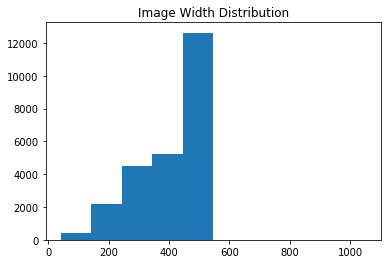

In [18]:
plt.hist(width, bins=10)
plt.title('Image Width Distribution')
plt.show()

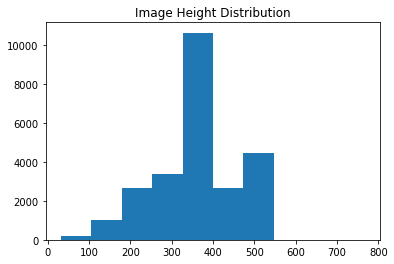

In [19]:
plt.hist(height, bins=10)
plt.title('Image Height Distribution')
plt.show()

Next, go the the second notebook to train your transfer learning model.